In [1]:
import re
def normalize_name(name):
    name = name.lower()
    name = re.sub(r"[.,\[\]\/#!$%\^\*;:{}=\_`~()@<>]", " ", name)
    name = re.sub(r"\s+", " ", name).strip()
    return name

In [23]:
import json
import pandas as pd
from tqdm import tqdm
import torch
import os
from collections import Counter, OrderedDict
import matplotlib

In [31]:
def title_visualize(pairs):
    min_length = 0
    title_len = [len(pair[1].split(' ') if not pair[1]=='' else []) for pair in pairs if len(pair[1].split(' '))>=min_length]
    title_len_avg = sum(title_len)/len(title_len)
    title_len_counts = Counter(sorted(title_len))
    min_len = 0 #min(title_len)
    max_len = 21 #max(title_len)
    for l in range(min_len, max_len+1):
        if not title_len_counts.get(l):
            title_len_counts[l] = 0
    title_len_counts = OrderedDict(sorted(title_len_counts.items()))
    df = pd.DataFrame.from_dict(title_len_counts, orient='index')
    print('# of playlist with title length >= {}: '.format(min_length), len(title_len))
    print('title length average: ', title_len_avg)
    axes = df.plot(kind='bar', figsize=(7, 4.8), fontsize=14, width=0.8) #
    axes.set_xlabel('Title length', fontsize=20, labelpad=7)
    matplotlib.pyplot.xticks(rotation = 45)
    axes.set_ylabel('Number of playlists', fontsize=20, labelpad=10)
    axes.legend().remove()
    
def track_visualize(pairs):
    min_length = 0
    song_len = [len(pair[0].split(' ') if not pair[0]=='' else []) for pair in pairs if len(pair[0].split(' '))>=min_length]
    song_len_avg = sum(song_len)/len(song_len)
    song_len_counts = Counter(sorted(song_len))
    df = pd.DataFrame.from_dict(song_len_counts, orient='index')
    print('# of playlist with songs length >= {}: '.format(min_length), len(song_len))
    print('song length average: ', song_len_avg)
    axes = df.plot(kind='bar', figsize=(50, 20), fontsize=55, style='italic')
    axes.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(25))
    axes.tick_params(axis='x', which='major', pad=10)
    axes.set_xlabel('Number of tracks', fontsize=80, labelpad=20)
    matplotlib.pyplot.xticks(rotation = 45)
    axes.set_ylabel('Number of playlists', fontsize=80, labelpad=20)
    axes.legend().remove()

# Original Dataset

In [32]:
# Data Loader
melon_train = pd.read_json(os.path.join("../dataset/source/melon/", "train.json"))
melon_val = pd.read_json(os.path.join("../dataset/source/melon/", "val.json"))
melon_test = pd.read_json(os.path.join("../dataset/source/melon/", "test.json"))

melon_playlist = pd.concat([melon_train, melon_val, melon_test], axis=0)
pairs = []
for idx, ply in tqdm(melon_playlist.iterrows()):
    track_list = ' '.join(list(map(str, ply['songs']))) if not ply['songs']==[] else ''
    title_token = normalize_name(ply['plylst_title']) #ply['name'].lower().strip()
    pairs.append([track_list, title_token])

148826it [00:13, 10737.59it/s]


# of playlist with title length >= 0:  148826
title length average:  3.650088022254176


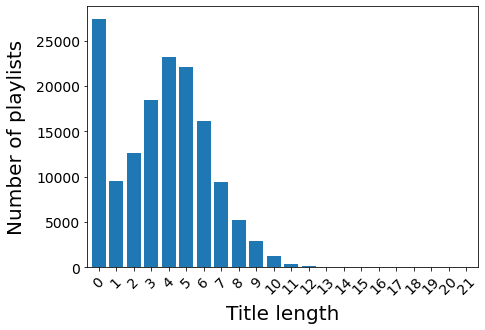

In [33]:
title_visualize(pairs)

# of playlist with songs length >= 0:  148826
song length average:  39.67531210944324


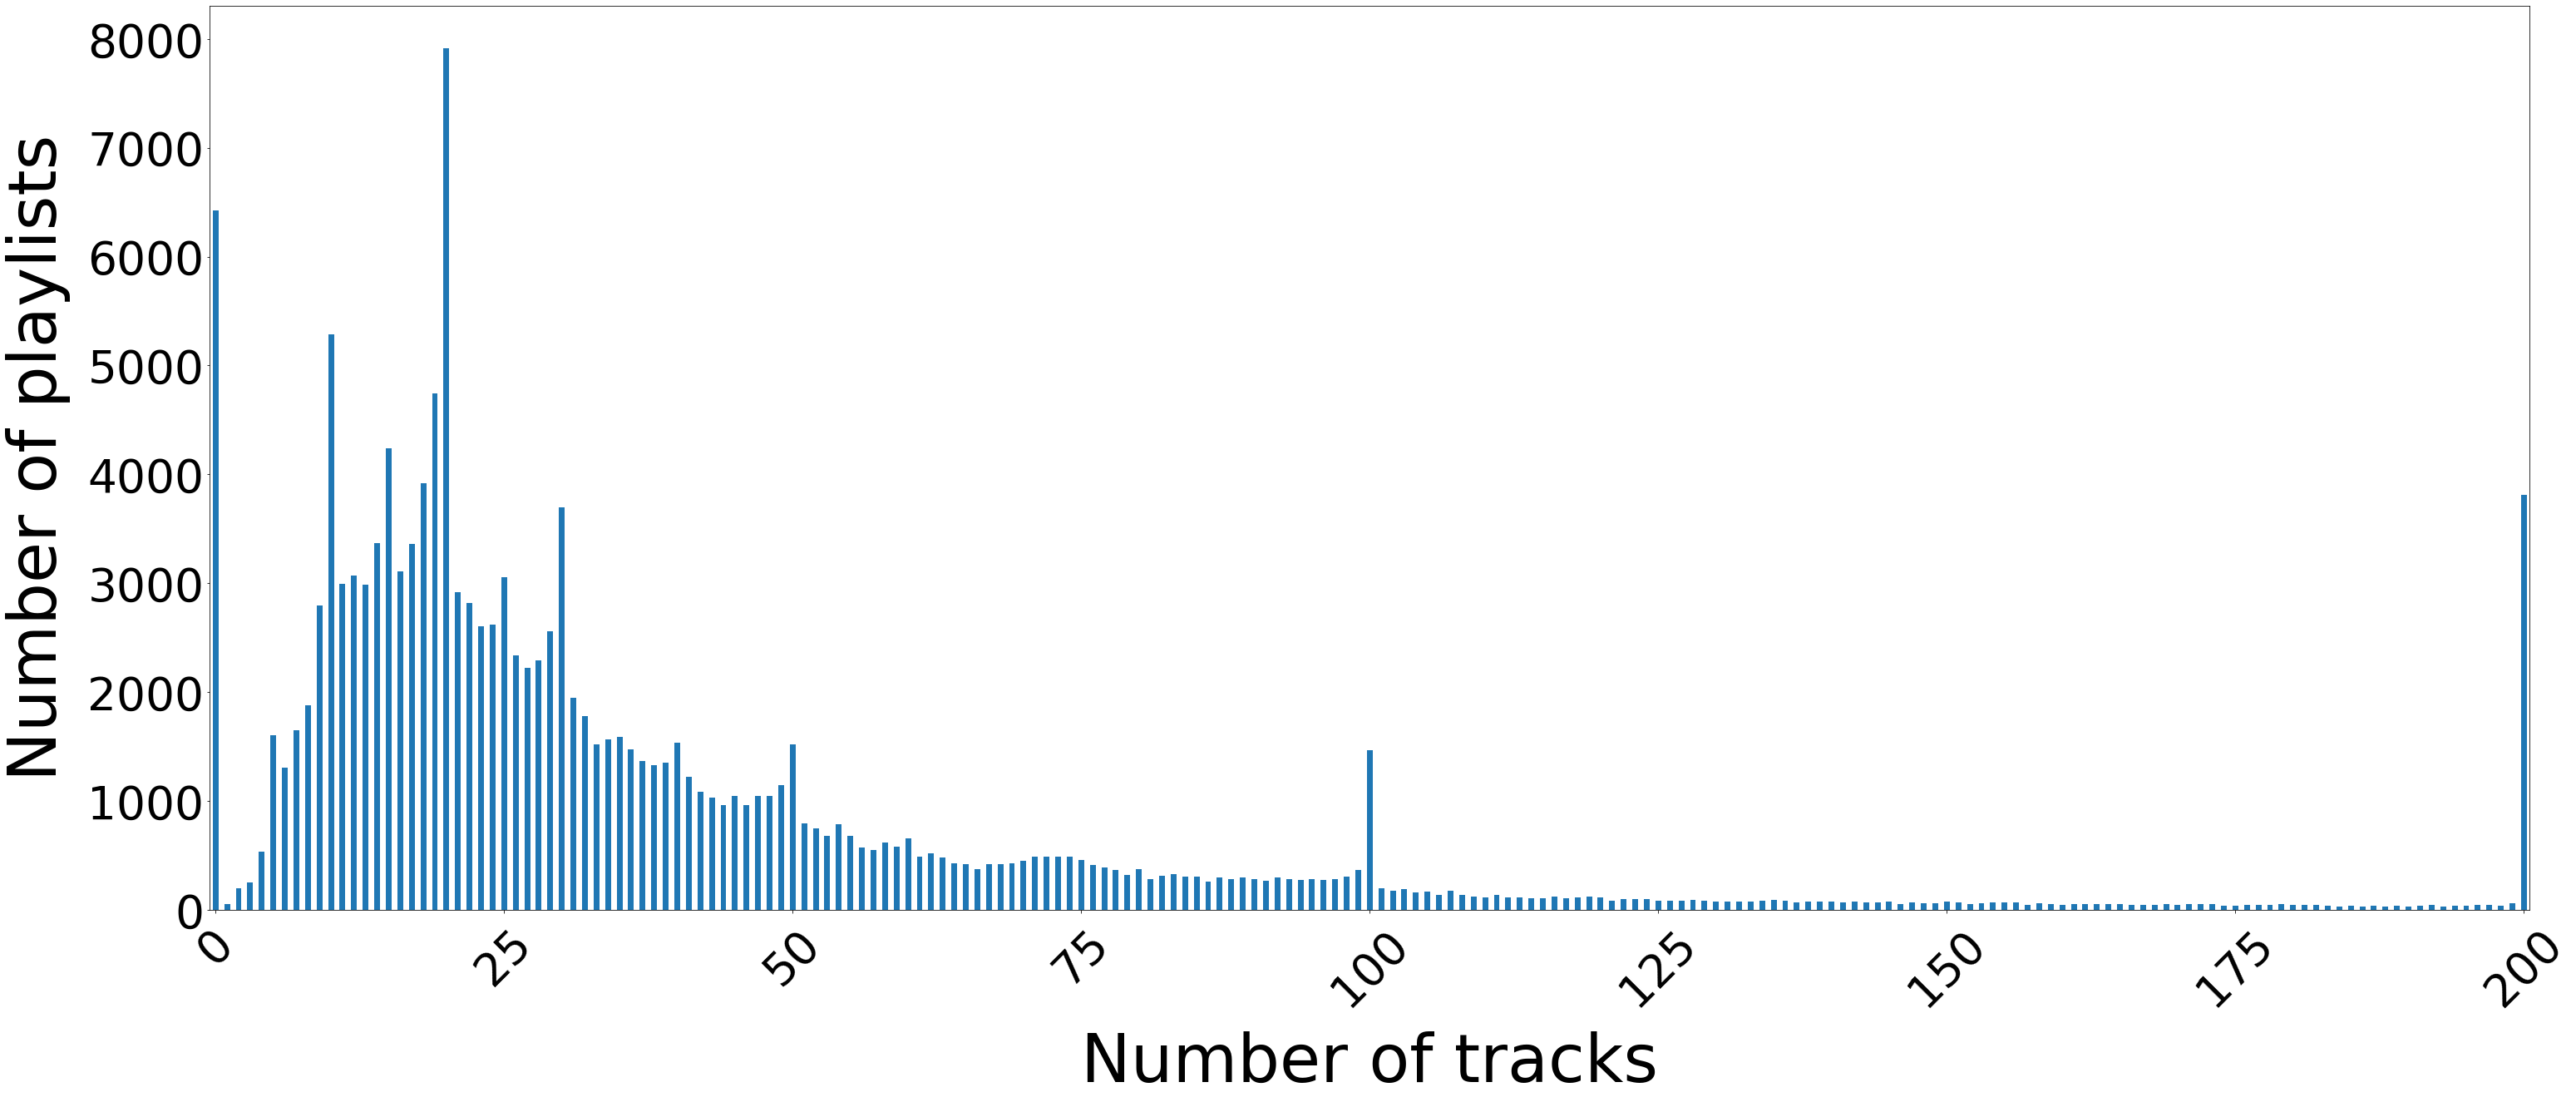

In [34]:
track_visualize(pairs)

# Check Filtered Dataset

In [35]:
melon_filtered = torch.load("../dataset/split/melon_filtered.pt")

In [36]:
pairs = []
for idx, ply in tqdm(enumerate(melon_filtered)):
    track_list = ' '.join(list(map(str, ply['songs']))) if not ply['songs']==[] else ''
    title_token = normalize_name(ply['plylst_title']) #ply['name'].lower().strip()
    pairs.append([track_list, title_token])

51404it [00:00, 103377.15it/s]


# of playlist with title length >= 0:  51404
title length average:  4.678098980624076


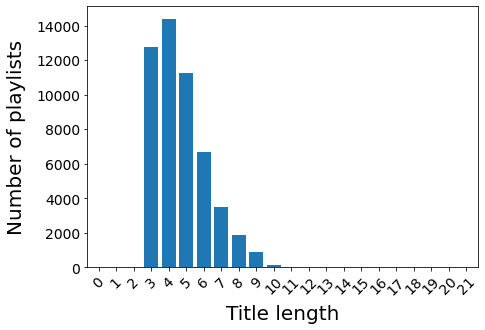

In [37]:
title_visualize(pairs)

# of playlist with songs length >= 0:  51404
song length average:  46.16905299198506


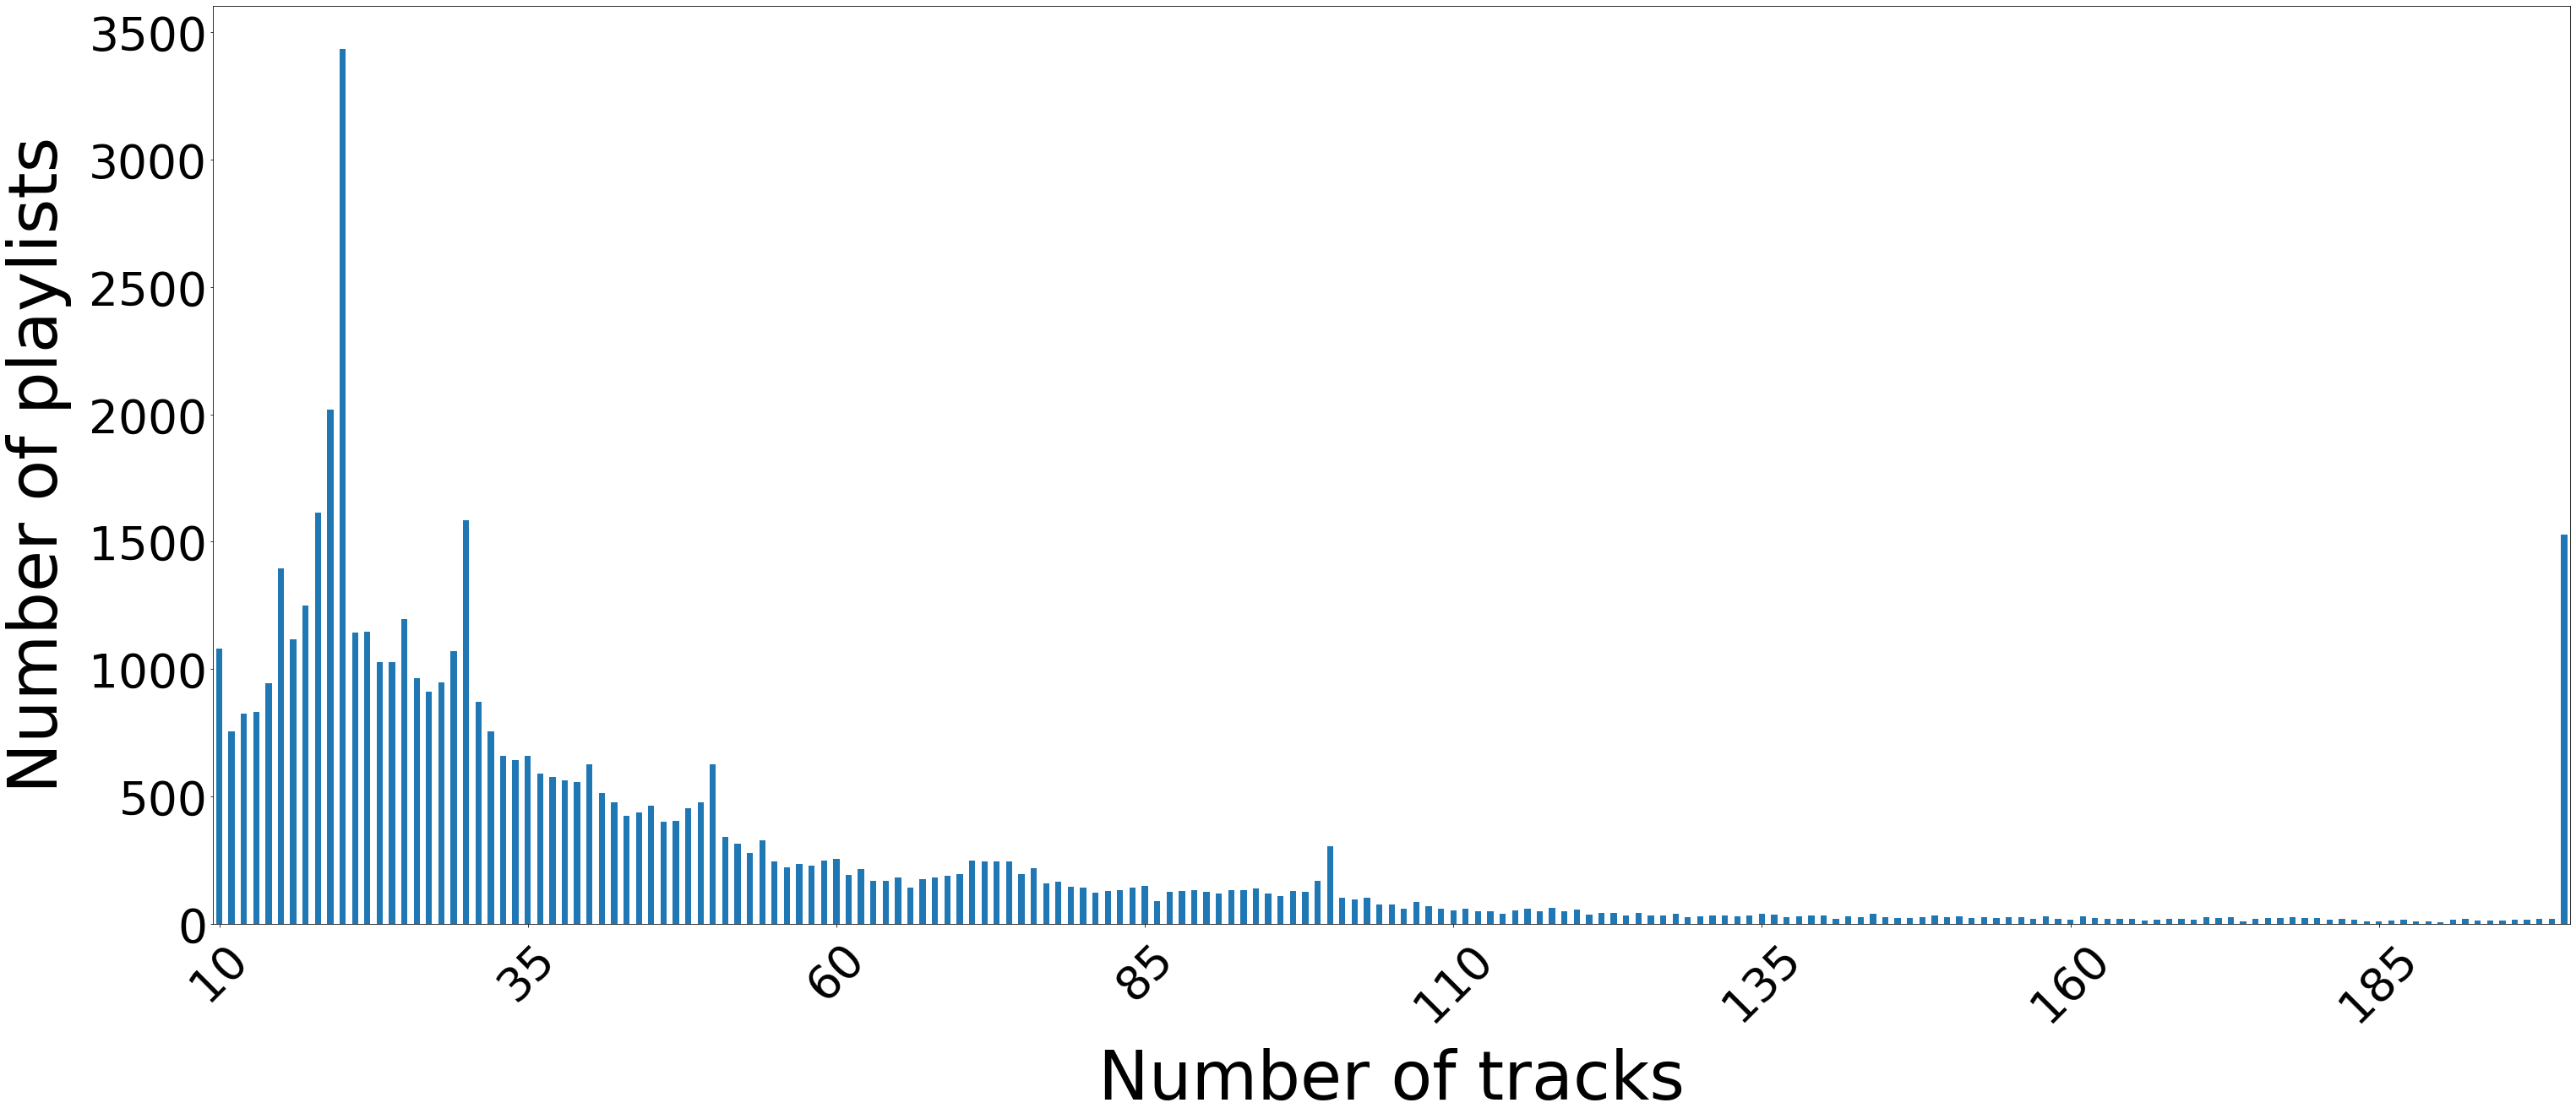

In [38]:
track_visualize(pairs)